In [1]:
import tensorflow as tf
from KyleNet import KyleNet
from pathlib import Path

# Get the metadata
META = Path(".").resolve().joinpath("metadata.csv")

c:\users\kyle\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\kyle\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\users\kyle\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
if tf.test.gpu_device_name():
    print(f"GPU Device: {tf.test.gpu_device_name()}\n")
else:
    print("Running off of CPU\n")

GPU Device: /device:GPU:0



## Experiment 1.
##### This experiment is to gauge the baseline performance of the model before future improvements

In [3]:
# Call the KyleNet class
baseline = KyleNet(META, "Experiment 1")

Found 75697 validated image filenames belonging to 2 classes.
Found 18924 validated image filenames belonging to 2 classes.


In [4]:
# See what we're working with
baseline.Summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

Epoch 1/20
591/591 [==============================] - 332s 562ms/step - loss: 0.0632 - accuracy: 0.9789 - val_loss: 0.0793 - val_accuracy: 0.9678

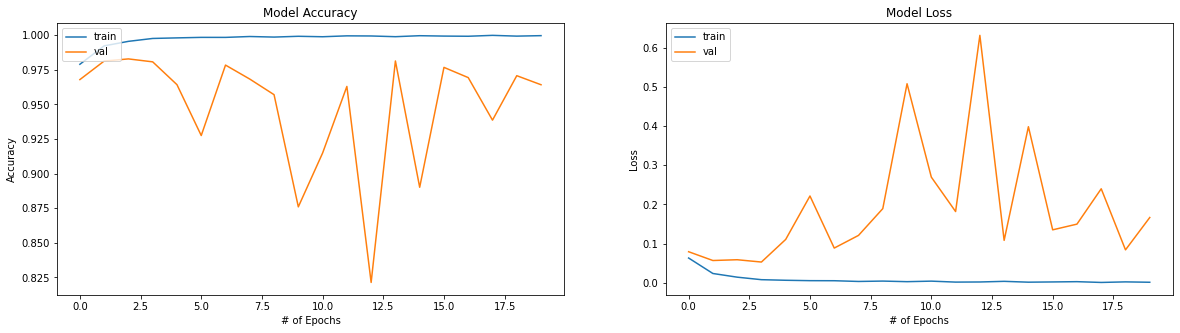

In [5]:
# Train the model
baseline.Train()

In [6]:
# Evaluate the models performance
baseline.Evaluate()

148/148 [==============================] - 62s 417ms/step - loss: 0.1661 - accuracy: 0.9641

In [7]:
predictions = baseline.Predict()

148/148 [==============================] - 62s 417ms/step

In [8]:
baseline.MetricReport(predictions)

              precision    recall  f1-score   support

    COVID-19       1.00      0.96      0.98     18907
   NON-COVID       0.02      0.82      0.04        17

    accuracy                           0.96     18924
   macro avg       0.51      0.89      0.51     18924
weighted avg       1.00      0.96      0.98     18924



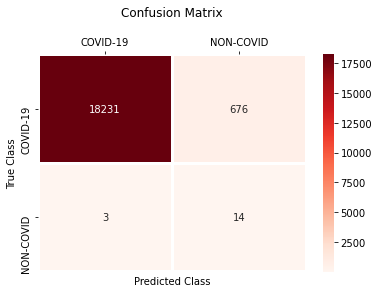

In [9]:
baseline.ConfusionMatrix(predictions)

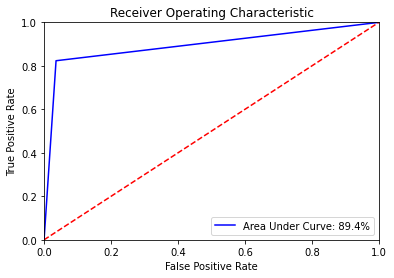

In [10]:
baseline.ROC(predictions)

In [11]:
baseline.Save()